<a href="https://colab.research.google.com/github/Akash-Adak/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd              # Imports the pandas library and gives it the alias 'pd'.
                                 # Pandas is used for handling and analyzing structured data (like tables, CSVs, DataFrames).

import seaborn as sns            # Imports the seaborn library and gives it the alias 'sns'.
                                 # Seaborn is built on top of matplotlib and is used for creating beautiful, statistical data visualizations.

import matplotlib.pyplot as plt  # Imports the pyplot module from matplotlib and gives it the alias 'plt'.
                                 # Pyplot provides functions to create plots, charts, and graphs.

import numpy as np               # Imports the numpy library and gives it the alias 'np'.
                                 # Numpy is used for numerical computations, arrays, and mathematical operations.


In [3]:
mall_data = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')
# Uses pandas (pd) to read the CSV file named 'Mall_Customers (3).csv'.
# The data from the CSV is loaded into a DataFrame called mall_data.
# A DataFrame is like a table with rows and columns, perfect for data analysis.

mall_data.head()
# Displays the first 5 rows of the DataFrame mall_data by default.
# Useful for quickly checking if the data was loaded correctly and seeing the structure (columns, sample values).


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_data.info()
# This method prints a concise summary of the DataFrame 'mall_data'.
# It shows:
#   - The total number of entries (rows) in the dataset.
#   - The index range (start and end).
#   - Column names and their data types (e.g., int64, float64, object).
#   - How many non-null (non-missing) values each column has.
#   - The memory usage of the DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_data.describe()
# Generates descriptive statistics for the numeric columns in the DataFrame 'mall_data'.
# By default, it includes:
#   - count: number of non-null values in each column
#   - mean: average value
#   - std: standard deviation (spread of the data)
#   - min: smallest value
#   - 25%: first quartile (Q1)
#   - 50%: median (Q2)
#   - 75%: third quartile (Q3)
#   - max: largest value


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_data.isnull().sum()
# Checks for missing (null/NaN) values in the DataFrame 'mall_data'.
# Step 1: mall_data.isnull() → returns a DataFrame of the same shape,
#         with True where a value is missing and False otherwise.
# Step 2: .sum() → adds up the True values (since True = 1, False = 0),
#         giving the total count of missing values for each column.
# The result is a Series showing how many null values exist in each column.


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

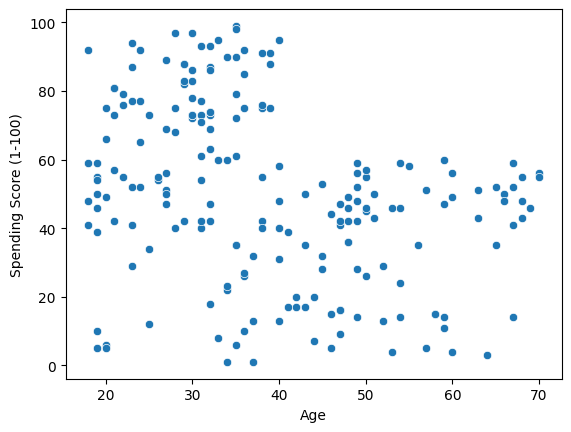

In [7]:
sns.scatterplot(
    x='Age',                          # Sets the x-axis values to the 'Age' column from the DataFrame.
    y='Spending Score (1-100)',       # Sets the y-axis values to the 'Spending Score (1-100)' column.
    data=mall_data,                   # Specifies the DataFrame 'mall_data' as the source of the data.
    legend='full'                     # Ensures that the legend (if hue/style is added later) shows all categories.
)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

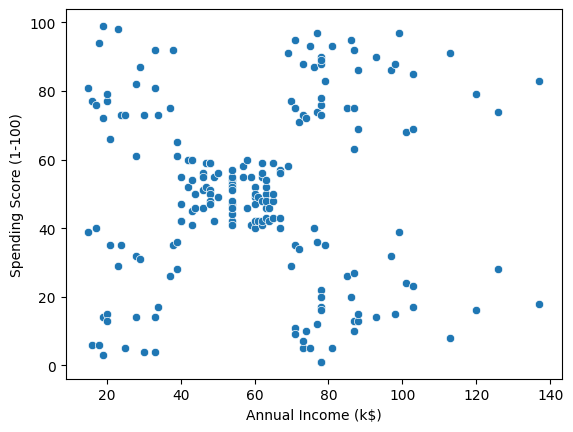

In [8]:
sns.scatterplot(
    x='Annual Income (k$)',           # Sets the x-axis values to the 'Annual Income (k$)' column from the DataFrame.
    y='Spending Score (1-100)',       # Sets the y-axis values to the 'Spending Score (1-100)' column.
    data=mall_data,                   # Specifies the DataFrame 'mall_data' as the source of the data.
    legend='full'                     # Ensures that if a hue/style is added later, the legend shows all categories.
)


In [9]:
from sklearn.cluster import KMeans
# Imports the KMeans class from the 'cluster' module of scikit-learn (sklearn).
# KMeans is an unsupervised machine learning algorithm used for clustering data.
# It groups data points into 'k' clusters based on similarity (distance to cluster centers).


In [10]:
x_numerics = mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]
# Creates a new DataFrame called 'x_numerics' from 'mall_data'.
# It selects only three columns:
#   - 'Age' → customer's age
#   - 'Annual Income (k$)' → customer's annual income in thousands of dollars
#   - 'Spending Score (1-100)' → a score assigned based on customer spending behavior
# This subset is often used as input features for clustering (like KMeans).


In [11]:
x_numerics
# Displays the DataFrame 'x_numerics' that you created earlier.
# It contains only the numeric columns you selected:
#   - Age
#   - Annual Income (k$)
#   - Spending Score (1-100)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
!pip install yellowbrick
# The '!' at the beginning tells Jupyter Notebook/Colab to run a shell command (not Python code).
# 'pip' is Python's package manager, used to install external libraries.
# 'yellowbrick' is a visualization library built on top of matplotlib and scikit-learn.
# It provides diagnostic visualizations for machine learning models (like elbow method for KMeans, classification reports, ROC curves, etc.).


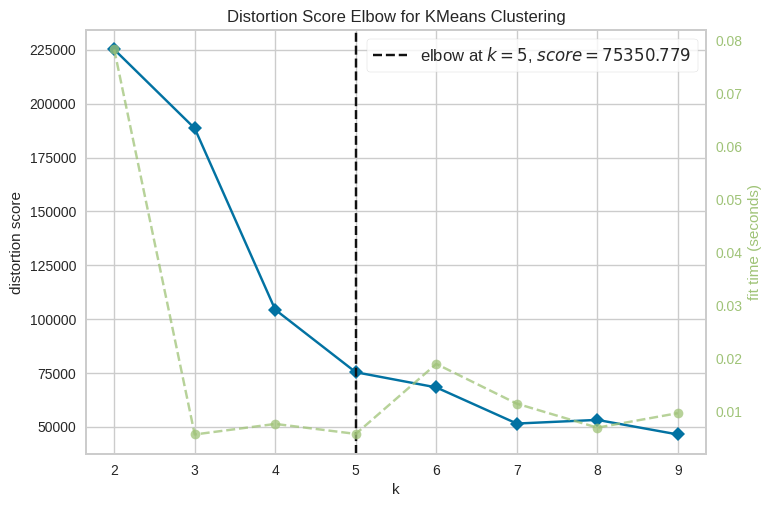

In [13]:
from yellowbrick.cluster import KElbowVisualizer
# Imports the KElbowVisualizer class from Yellowbrick.
# This tool helps determine the optimal number of clusters (k) for KMeans using the "elbow method".

model = KMeans(random_state=1)
# Creates a KMeans clustering model with a fixed random_state (for reproducibility).
# No number of clusters is specified yet — the visualizer will test different values.

visualizer = KElbowVisualizer(model, k=(2,10))
# Initializes the visualizer to check cluster sizes between 2 and 10.
# It will run KMeans for each k in this range and plot the results.

visualizer.fit(x_numerics)
# Fits the visualizer on your dataset (x_numerics: Age, Annual Income, Spending Score).
# Runs KMeans multiple times with different k values.

visualizer.show()
# Displays the elbow plot generated by Yellowbrick.
# The "elbow" point in the curve suggests the optimal number of clusters.

plt.show()
# Ensures the plot is rendered properly using matplotlib.


In [14]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(x_numerics)
# Creates a KMeans model with 5 clusters.
# 'n_clusters=5' → tells KMeans to divide the data into 5 groups.
# 'init="k-means++"' → smart initialization method that chooses starting centroids efficiently,
#                      helping the algorithm converge faster and avoid poor clustering.
# '.fit(x_numerics)' → trains the KMeans model on your numeric dataset (Age, Income, Spending Score).
# The trained model is stored in 'KM_5_clusters'.

KM_5_clusterd = x_numerics.copy()
# Makes a copy of the original numeric DataFrame (x_numerics).
# This ensures you don’t overwrite the original data while adding cluster labels.

KM_5_clusterd.loc[:, 'Cluster'] = KM_5_clusters.labels_
# Adds a new column called 'Cluster' to the copied DataFrame.
# 'KM_5_clusters.labels_' contains the cluster assignment (0–4) for each row/customer.
# Each customer is now tagged with the cluster they belong to.


In [15]:
KM_5_clusterd
# Displays the DataFrame 'KM_5_clusterd' that you created earlier.
# It contains the numeric features (Age, Annual Income, Spending Score)
# plus the new 'Cluster' column showing each customer's assigned cluster (0–4).


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,0
197,32,126,74,1
198,32,137,18,0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

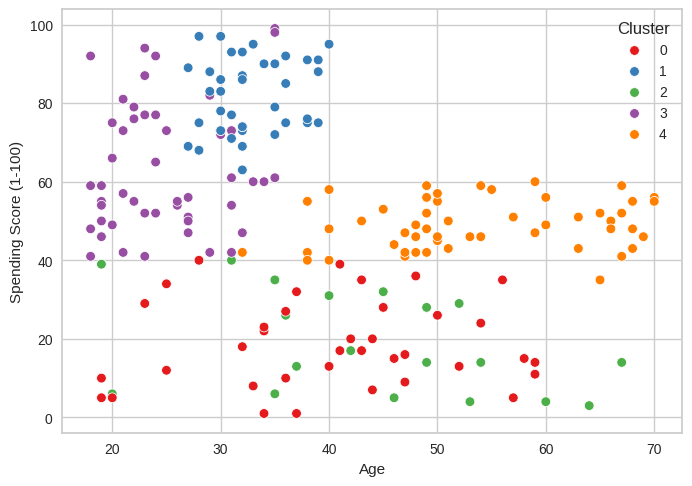

In [16]:
sns.scatterplot(
    x='Age',                          # Sets the x-axis values to the 'Age' column.
    y='Spending Score (1-100)',       # Sets the y-axis values to the 'Spending Score (1-100)' column.
    data=KM_5_clusterd,               # Uses the DataFrame that includes the cluster labels.
    hue='Cluster',                    # Colors each point based on its cluster assignment (0–4).
    palette='Set1',                   # Chooses the 'Set1' color palette for distinct cluster colors.
    legend='full'                     # Ensures the legend shows all clusters.
)


AttributeError: 'DataFrame' object has no attribute 'cluster_centers_'

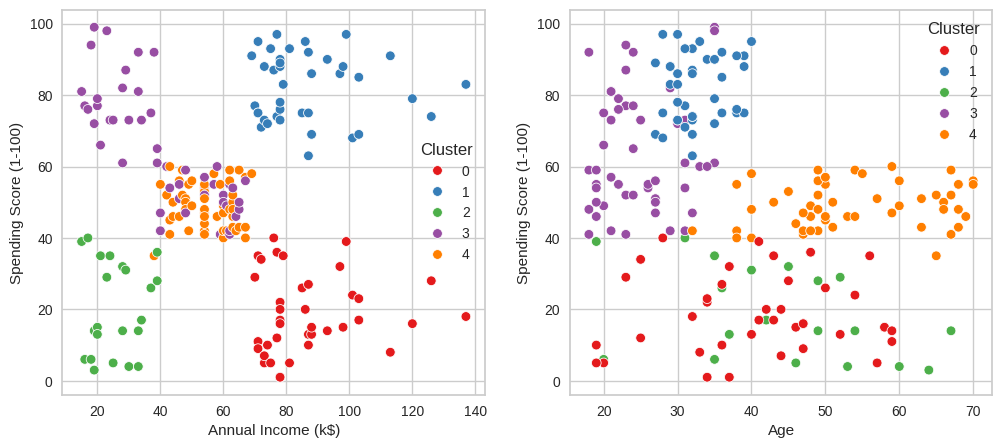

In [17]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))
# Creates a figure (fig1) with 1 row and 2 columns of subplots (axes).
# figsize=(12, 5) sets the overall size of the figure in inches.

sns.scatterplot(
    x='Annual Income (k$)',              # X-axis: Annual Income
    y='Spending Score (1-100)',          # Y-axis: Spending Score
    data=KM_5_clusterd,                  # Data source with cluster labels
    hue='Cluster',                       # Colors points by cluster
    ax=axes[0],                          # Draws this plot on the first subplot (left side)
    palette='Set1',                      # Uses Set1 color palette
    legend='full'                        # Shows all clusters in the legend
)

sns.scatterplot(
    x='Age',                             # X-axis: Age
    y='Spending Score (1-100)',          # Y-axis: Spending Score
    data=KM_5_clusterd,                  # Data source with cluster labels
    hue='Cluster',                       # Colors points by cluster
    ax=axes[1],                          # Draws this plot on the second subplot (right side)
    palette='Set1',                      # Uses Set1 color palette
    legend='full'                        # Shows all clusters in the legend
)

axes[0].scatter(
    KM_5_clusterd.cluster_centers_[:, 0],  # X-coordinates of cluster centers (Annual Income)
    KM_5_clusterd.cluster_centers_[:, 1],  # Y-coordinates of cluster centers (Spending Score)
    s=40,                                  # Size of the centroid markers
    c='black',                             # Color of the centroid markers
    marker='X'                             # Shape of the centroid markers
)

axes[1].scatter(
    KM_5_clusterd.cluster_centers_[:, 2],  # X-coordinates of cluster centers (Age)
    KM_5_clusterd.cluster_centers_[:, 1],  # Y-coordinates of cluster centers (Spending Score)
    s=40,                                  # Size of the centroid markers
    c='black',                             # Color of the centroid markers
    marker='X'                             # Shape of the centroid markers
)

plt.show()
# Displays the final figure with both scatter plots side by side.
